In [ ]:
pip install pandas networkx numpy matplotlib


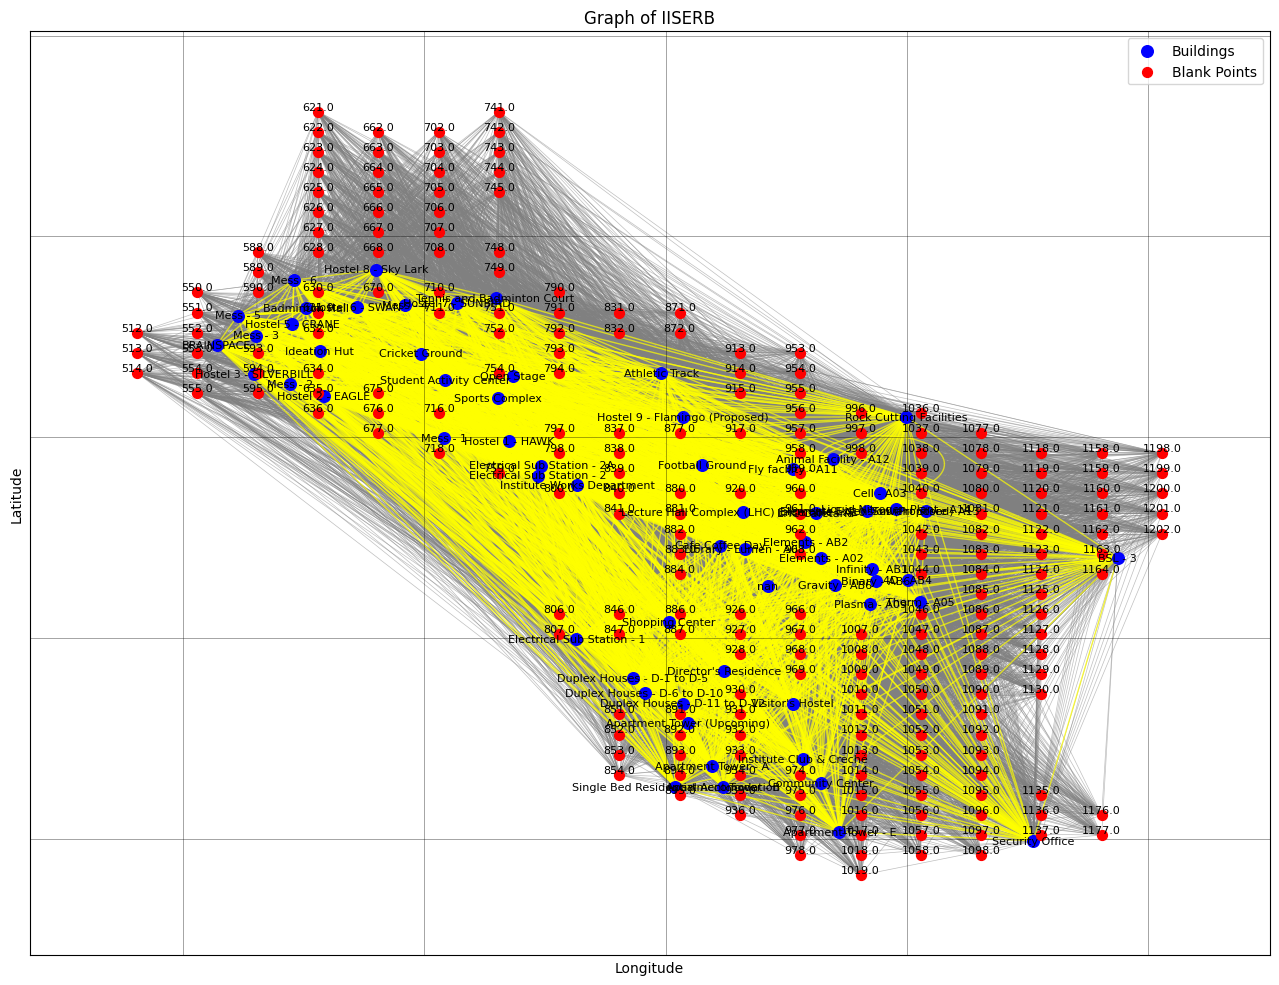

Iteration 1:
Starting point: 632.0, Initial average cost: 836.07
Final node: 716, Final average cost: 682.22

Iteration 2:
Starting point: 1161.0, Initial average cost: 1007.63
Final node: 716, Final average cost: 682.22

Iteration 3:
Starting point: 872.0, Initial average cost: 897.13
Final node: 716, Final average cost: 682.22

Iteration 4:
Starting point: Rock Cutting Facilities, Initial average cost: 769.95
Final node: 716, Final average cost: 682.22

Iteration 5:
Starting point: 1177.0, Initial average cost: 1215.67
Final node: 716, Final average cost: 682.22

Iteration 6:
Starting point: 716.0, Initial average cost: 682.22
Final node: 716.0, Final average cost: 682.22

Iteration 7:
Starting point: 967.0, Initial average cost: 730.47
Final node: 716, Final average cost: 682.22

Iteration 8:
Starting point: 595.0, Initial average cost: 885.10
Final node: 716, Final average cost: 682.22

Iteration 9:
Starting point: 1019.0, Initial average cost: 1317.00
Final node: 716, Final averag

In [ ]:
import pandas as pd
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt


building_coordinates_path = 'building_coordinates.csv'
modified_blank_coordinates_path = 'modified_blank_coordinates.csv'
modified_networkdist_blank_to_building_path = 'final_networkdist_blank_to_building.csv'
modified_networkdist_building_to_building_path = 'final_networkdist_building_to_building.csv'

building_data = pd.read_csv(building_coordinates_path)
blank_data = pd.read_csv(modified_blank_coordinates_path)
blank_to_building_data = pd.read_csv(modified_networkdist_blank_to_building_path)
building_to_building_data = pd.read_csv(modified_networkdist_building_to_building_path)


G = nx.Graph()

for index, row in building_data.iterrows():
    G.add_node(row['name'], type='building', x=row['x'], y=row['y'])

for index, row in blank_data.iterrows():
    G.add_node(row['id'], type='point', x=row['x'], y=row['y'])

for index, row in blank_to_building_data.iterrows():
    if row['total_cost'] > 0 and not G.has_edge(row['origin_id'], row['destination_id']):
        G.add_edge(row['origin_id'], row['destination_id'], weight=row['total_cost'])



for index, row in building_to_building_data.iterrows():

    if row['total_cost'] > 0 and not G.has_edge(row['origin_id'], row['destination_id']):
        G.add_edge(row['origin_id'], row['destination_id'], weight=row['total_cost'])


pos = {node:(G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}

plt.figure(figsize=(16, 12))

building_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'building']
nx.draw_networkx_nodes(G, pos, nodelist=building_nodes, node_color='blue', label='Buildings', node_size=70)
nx.draw_networkx_labels(G, pos, labels={node:node for node in building_nodes}, font_size=8,font_color='black')


point_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'point']
nx.draw_networkx_nodes(G, pos, nodelist=point_nodes, node_color='red', label='Blank Points',node_size=50)
nx.draw_networkx_labels(G, pos, labels={node:node for node in point_nodes}, font_size=8, font_color='black', verticalalignment='bottom')


nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'point' or G.nodes[edge[1]]['type'] == 'point'], edge_color='grey',width=0.5, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'building' and G.nodes[edge[1]]['type'] == 'building'], edge_color='yellow',width=1, alpha=0.7)



plt.title('Graph of IISERB')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.axis('on')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black', alpha=0.5)

plt.show()


def calculate_average_cost(graph, node):
    edges = list(graph.edges(node, data='weight'))
    if len(edges) == 0:
        return float('inf')

    total_cost = sum(weight for _, _, weight in edges if weight is not None)

    if total_cost == 0 or np.isnan(total_cost):
        return float('inf')

    return total_cost / len(edges)

def hill_climbing_with_random_restarts(graph, iterations=10):
    best_solution = None
    best_cost = float('inf')

    for iteration in range(1, iterations + 1):
        print(f"Iteration {iteration}:")
        start_node = random.choice(list(graph.nodes))
        current_node = start_node
        current_cost = calculate_average_cost(graph, current_node)

        print(f"Starting point: {start_node}, Initial average cost: {current_cost:.2f}")

        improving = True
        while improving:
            improving = False
            neighbors = list(graph.neighbors(current_node))
            for neighbor in neighbors:
                neighbor_cost = calculate_average_cost(graph, neighbor)
                if neighbor_cost < current_cost:
                    current_node = neighbor
                    current_cost = neighbor_cost
                    improving = True
                    break

        print(f"Final node: {current_node}, Final average cost: {current_cost:.2f}\n")

        if current_cost < best_cost:
            best_solution = current_node
            best_cost = current_cost

    optimal_location = {'ID/Name': best_solution, 'Average Cost': best_cost}
    node_data = graph.nodes[best_solution]
    optimal_location['Coordinates'] = (node_data['x'], node_data['y'])


    if 'type' in node_data and node_data['type'] == 'building':
        optimal_location['Type'] = 'Building'
    else:
        optimal_location['Type'] = 'Blank Point'

    return optimal_location


optimal_location = hill_climbing_with_random_restarts(G)
print("Optimal location:", optimal_location)


plt.figure(figsize=(16, 12))


nx.draw_networkx_nodes(G, pos, nodelist=building_nodes, node_color='blue', label='Buildings', node_size=70)
nx.draw_networkx_labels(G, pos, labels={node: node for node in building_nodes}, font_size=8, font_color='black')


nx.draw_networkx_nodes(G, pos, nodelist=point_nodes, node_color='red', label='Blank Points', node_size=50)
nx.draw_networkx_labels(G, pos, labels={node: node for node in point_nodes}, font_size=8, font_color='black', verticalalignment='bottom')


nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'point' or G.nodes[edge[1]]['type'] == 'point'], edge_color='grey', width=0.5, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'building' and G.nodes[edge[1]]['type'] == 'building'], edge_color='yellow', width=1, alpha=0.7)


optimal_node = optimal_location['ID/Name']
optimal_pos = {optimal_node: pos[optimal_node]}
nx.draw_networkx_nodes(G, optimal_pos, nodelist=[optimal_node], node_color='green', label='Optimal Location', node_size=150, edgecolors='black', linewidths=2)
nx.draw_networkx_labels(G, optimal_pos, labels={optimal_node: optimal_node}, font_size=10, font_color='white')

plt.title('Graph of IISERB with Optimal Location Marked')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.axis('on')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black', alpha=0.5)

plt.show()

In [ ]:
import pandas as pd
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt


building_coordinates_path = 'building_coordinates.csv'
modified_blank_coordinates_path = 'modified_blank_coordinates.csv'
modified_networkdist_blank_to_building_path = 'final_networkdist_blank_to_building.csv'
modified_networkdist_building_to_building_path = 'final_networkdist_building_to_building.csv'

building_data = pd.read_csv(building_coordinates_path)
blank_data = pd.read_csv(modified_blank_coordinates_path)
blank_to_building_data = pd.read_csv(modified_networkdist_blank_to_building_path)
building_to_building_data = pd.read_csv(modified_networkdist_building_to_building_path)

to_remove = [
    512.0, 513.0, 514.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 588.0, 589.0, 590.0,
    621.0, 622.0, 623.0, 624.0, 625.0, 626.0, 627.0, 628.0, 662.0, 663.0, 664.0, 665.0,
    666.0, 667.0, 668.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 741.0, 742.0,
    743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 790.0, 791.0, 831.0, 832.0, 871.0,
    872.0, 913.0, 914.0, 953.0, 954.0, 955.0, 1036.0, 1037.0, 1038.0, 1039.0, 1040.0,
    1077.0, 1078.0, 1079.0, 1080.0, 1118.0, 1119.0, 1120.0, 1121.0, 1122.0, 1158.0,
    1159.0, 1160.0, 1161.0, 1162.0, 1198.0, 1199.0, 1200.0, 1201.0, 1202.0, 1126.0,
    1127.0, 1128.0, 1129.0, 1130.0, 1176.0, 1177.0
]


blank_data = blank_data[~blank_data['id'].isin(to_remove)]

G = nx.Graph()

for index, row in building_data.iterrows():
    G.add_node(row['name'], type='building', x=row['x'], y=row['y'])

for index, row in blank_data.iterrows():
    G.add_node(row['id'], type='point', x=row['x'], y=row['y'])

for index, row in blank_to_building_data.iterrows():
    if row['total_cost'] > 0 and not G.has_edge(row['origin_id'], row['destination_id']):
        G.add_edge(row['origin_id'], row['destination_id'], weight=row['total_cost'])



for index, row in building_to_building_data.iterrows():

    if row['total_cost'] > 0 and not G.has_edge(row['origin_id'], row['destination_id']):
        G.add_edge(row['origin_id'], row['destination_id'], weight=row['total_cost'])


# Filter out nodes without 'type' attribute
building_nodes = [node for node, data in G.nodes(data=True) if 'type' in data and data['type'] == 'building']
point_nodes = [node for node, data in G.nodes(data=True) if 'type' in data and data['type'] == 'point']

pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes() if node in building_nodes or node in point_nodes}
plt.figure(figsize=(16, 12))

#building_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'building']
nx.draw_networkx_nodes(G, pos, nodelist=building_nodes, node_color='blue', label='Buildings', node_size=70)
nx.draw_networkx_labels(G, pos, labels={node:node for node in building_nodes}, font_size=8,font_color='black')


#point_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'point']
nx.draw_networkx_nodes(G, pos, nodelist=point_nodes, node_color='red', label='Blank Points',node_size=50)
nx.draw_networkx_labels(G, pos, labels={node:node for node in point_nodes}, font_size=8, font_color='black', verticalalignment='bottom')


nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]].get('type') == 'point' or G.nodes[edge[1]].get('type') == 'point'], edge_color='grey',width=0.5, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]].get('type') == 'building' and G.nodes[edge[1]].get('type') == 'building'], edge_color='yellow',width=1, alpha=0.7)

#nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'point' or G.nodes[edge[1]]['type'] == 'point'], edge_color='grey',width=0.5, alpha=0.5)
#nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'building' and G.nodes[edge[1]]['type'] == 'building'], edge_color='yellow',width=1, alpha=0.7)



plt.title('Graph of IISERB')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.axis('on')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black', alpha=0.5)

plt.show()


def calculate_average_cost(graph, node):
    edges = list(graph.edges(node, data='weight'))
    if len(edges) == 0:
        return float('inf')

    total_cost = sum(weight for _, _, weight in edges if weight is not None)

    if total_cost == 0 or np.isnan(total_cost):
        return float('inf')

    return total_cost / len(edges)

def hill_climbing_with_random_restarts(graph, iterations=10):
    best_solution = None
    best_cost = float('inf')

    for iteration in range(1, iterations + 1):
        print(f"Iteration {iteration}:")
        start_node = random.choice(list(graph.nodes))
        current_node = start_node
        current_cost = calculate_average_cost(graph, current_node)

        print(f"Starting point: {start_node}, Initial average cost: {current_cost:.2f}")

        improving = True
        while improving:
            improving = False
            neighbors = list(graph.neighbors(current_node))
            for neighbor in neighbors:
                neighbor_cost = calculate_average_cost(graph, neighbor)
                if neighbor_cost < current_cost:
                    current_node = neighbor
                    current_cost = neighbor_cost
                    improving = True
                    break

        print(f"Final node: {current_node}, Final average cost: {current_cost:.2f}\n")

        if current_cost < best_cost:
            best_solution = current_node
            best_cost = current_cost

    optimal_location = {'ID/Name': best_solution, 'Average Cost': best_cost}
    node_data = graph.nodes[best_solution]
    optimal_location['Coordinates'] = (node_data['x'], node_data['y'])


    if 'type' in node_data and node_data['type'] == 'building':
        optimal_location['Type'] = 'Building'
    else:
        optimal_location['Type'] = 'Blank Point'

    return optimal_location


optimal_location = hill_climbing_with_random_restarts(G)
print("Optimal location:", optimal_location)


plt.figure(figsize=(16, 12))


nx.draw_networkx_nodes(G, pos, nodelist=building_nodes, node_color='blue', label='Buildings', node_size=70)
nx.draw_networkx_labels(G, pos, labels={node: node for node in building_nodes}, font_size=8, font_color='black')


nx.draw_networkx_nodes(G, pos, nodelist=point_nodes, node_color='red', label='Blank Points', node_size=50)
nx.draw_networkx_labels(G, pos, labels={node: node for node in point_nodes}, font_size=8, font_color='black', verticalalignment='bottom')

nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]].get('type') == 'point' or G.nodes[edge[1]].get('type') == 'point'], edge_color='grey',width=0.5, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]].get('type') == 'building' and G.nodes[edge[1]].get('type') == 'building'], edge_color='yellow',width=1, alpha=0.7)
#nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'point' or G.nodes[edge[1]]['type'] == 'point'], edge_color='grey', width=0.5, alpha=0.5)
#nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.nodes[edge[0]]['type'] == 'building' and G.nodes[edge[1]]['type'] == 'building'], edge_color='yellow', width=1, alpha=0.7)


optimal_node = optimal_location['ID/Name']
optimal_pos = {optimal_node: pos[optimal_node]}
nx.draw_networkx_nodes(G, optimal_pos, nodelist=[optimal_node], node_color='green', label='Optimal Location', node_size=150, edgecolors='black', linewidths=2)
nx.draw_networkx_labels(G, optimal_pos, labels={optimal_node: optimal_node}, font_size=10, font_color='white')

plt.title('Graph of IISERB with Optimal Location Marked')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.axis('on')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black', alpha=0.5)

plt.show()

Iteration 1:
Starting point: Security Office, Initial average cost: 1152.21
Final node: 716, Final average cost: 682.22

Iteration 2:
Starting point: 966.0, Initial average cost: 680.22
Final node: 966.0, Final average cost: 680.22

Iteration 3:
Starting point: 1177, Initial average cost: 1215.67
Final node: 716, Final average cost: 682.22

Iteration 4:
Starting point: 634.0, Initial average cost: 756.52
Final node: 716, Final average cost: 682.22

Iteration 5:
Starting point: 1009.0, Initial average cost: 741.30
Final node: 716, Final average cost: 682.22

Iteration 6:
Starting point: Infinity - AB1, Initial average cost: 811.67
Final node: 716, Final average cost: 682.22

Iteration 7:
Starting point: 554, Initial average cost: 926.43
Final node: 716, Final average cost: 682.22

Iteration 8:
Starting point: 635.0, Initial average cost: 879.26
Final node: 716, Final average cost: 682.22

Iteration 9:
Starting point: 702, Initial average cost: 1353.11
Final node: 716, Final average cost